In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn import tree

archivo = "iris.csv"

In [ ]:
datos = pd.read_csv(archivo)
datos.head()

In [ ]:
datos.groupby('species').size()


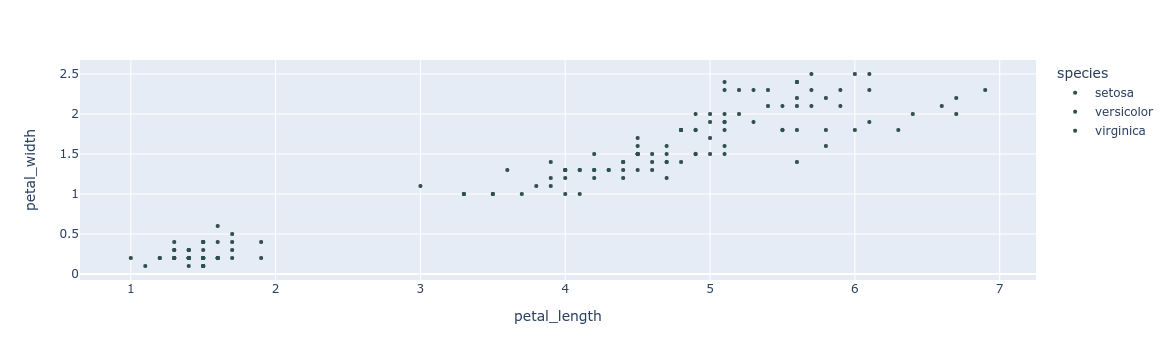

In [14]:
grafica = px.scatter(datos,x ="petal_length", y ="petal_width", color="species")
grafica.update_traces(marker=dict(size=2,
                                  line=dict(width = 2,
                                            color="DarkSlategray")),
                      selector=dict(mode="markers"))

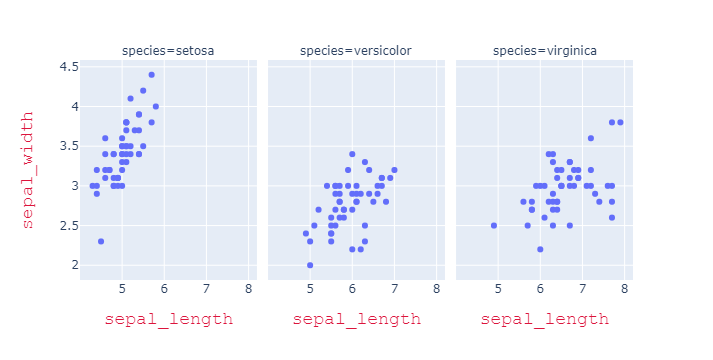

In [18]:
grafica1 = px.scatter(datos,x ="sepal_length", y ="sepal_width", facet_col = "species")
grafica1.update_xaxes(title_font=dict(size=18, family='Courier', color='crimson'))
grafica1.update_yaxes(title_font=dict(size=18, family='Courier', color='crimson'))

## Entrenar datos para predecir

In [34]:
X = datos.iloc[:,:-1].values
y = datos.iloc[:,4].values

### Esto tambien se puede realizar de la siguiente manera:

In [32]:
columnas = ["sepal_length","sepal_width","petal_length","petal_width"]
x = datos[columnas].values

## Datos de entreno

In [35]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=0.2)

In [37]:
print('Hay {} muestras en el conjunto de entrenamiento y {} muestras en el conjunto de pruebas (validacion)'.format(X_entreno.shape[0],X_prueba.shape[0]))

Hay 120 muestras en el conjunto de entrenamiento y 30 muestras en el conjunto de pruebas (validacion)


## Etiquetas para graficar

In [39]:
trace_specs = [
    [X_entreno, y_entreno, 'virginica', 'Entreno', 'square'],
    [X_entreno, y_entreno, 'versicolor', 'Entreno', 'circle'],
    [X_entreno, y_entreno, 'setosa', 'Entreno', 'diamond'],
    [X_prueba, y_prueba, 'virginica', 'Prueba', 'square-dot'],
    [X_prueba, y_prueba, 'versicolor', 'Prueba', 'circle-dot'],
    [X_prueba, y_prueba, 'setosa', 'Prueba', 'diamond-dot']
]

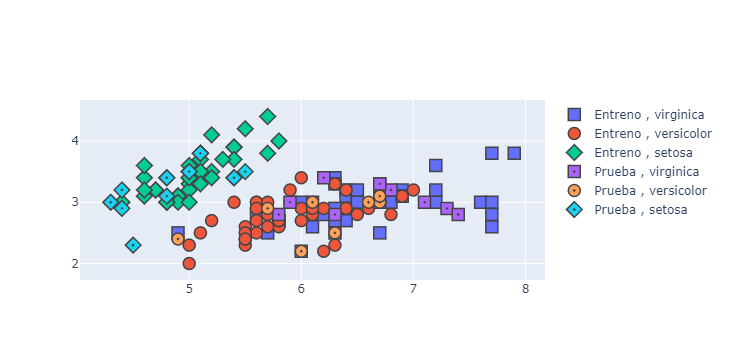

In [41]:
grafica2 = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} , {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
grafica2.update_traces(
    marker_size=12, marker_line_width=1.5
)


# Implementacion de modelo KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
error = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_entreno, y_entreno)
    pred_i = knn.predict(X_prueba)
    error.append(np.mean(pred_i != y_prueba))

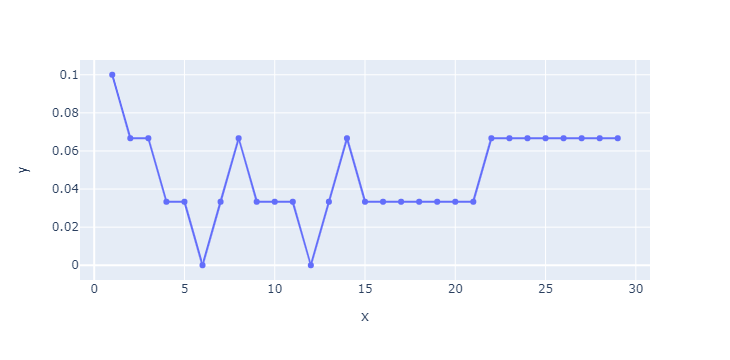

In [46]:
grafica4 = px.line(x=range(1,30), y =error, markers=True)
grafica4.show()

In [53]:
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=8)

clf.fit(X_entreno, y_entreno)

y_prediccion = clf.predict(X_prueba)

precision = accuracy_score(y_prueba, y_prediccion)*100

print('La precisión de nuestro modelo es: ' + str(round(precision, 2)) + ' %.')

La precisión de nuestro modelo es: 93.33 %.


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_prueba, y_prediccion))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.88      0.88         8
   virginica       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [55]:
valor_clasificar=[[5.7, 3.2 , 2.2, 3.2],[5.1, 3.8, 1.5, 0.3]]

prediccion_knn= clf.predict(valor_clasificar)

prediccion_knn

array(['versicolor', 'setosa'], dtype=object)